In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
print('x_train shape', x_train.shape, 'y_train shape', y_train.shape)

x_train shape (60000, 28, 28) y_train shape (60000,)


In [3]:
# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

60000 train set
10000 test set


In [7]:
y_train[20:40]

array([3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6],
      dtype=uint8)

In [4]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

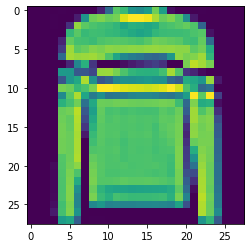

In [5]:
plt.imshow(x_train[5])

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [7]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [8]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
#Take a look at the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy', 'mse'])

In [11]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_valid, y_valid), callbacks=[tf.keras.callbacks.TensorBoard('log/1/train')])

Epoch 1/10
860/860 [==============================] - 71s 83ms/step - loss: 0.5683 - accuracy: 0.7911 - mse: 0.0288 - val_loss: 0.3641 - val_accuracy: 0.8714 - val_mse: 0.0186
Epoch 2/10
860/860 [==============================] - 76s 89ms/step - loss: 0.3971 - accuracy: 0.8576 - mse: 0.0205 - val_loss: 0.3104 - val_accuracy: 0.8866 - val_mse: 0.0162
Epoch 3/10
860/860 [==============================] - 82s 96ms/step - loss: 0.3472 - accuracy: 0.8729 - mse: 0.0181 - val_loss: 0.2811 - val_accuracy: 0.8998 - val_mse: 0.0148
Epoch 4/10
860/860 [==============================] - 71s 83ms/step - loss: 0.3219 - accuracy: 0.8811 - mse: 0.0169 - val_loss: 0.2751 - val_accuracy: 0.9004 - val_mse: 0.0146
Epoch 5/10
860/860 [==============================] - 75s 87ms/step - loss: 0.3012 - accuracy: 0.8905 - mse: 0.0158 - val_loss: 0.2533 - val_accuracy: 0.9094 - val_mse: 0.0134
Epoch 6/10
860/860 [==============================] - 71s 82ms/step - loss: 0.2869 - accuracy: 0.8943 - mse: 0.0152 - va

In [15]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9108999967575073


In [16]:
y_hat = model.predict(x_test)

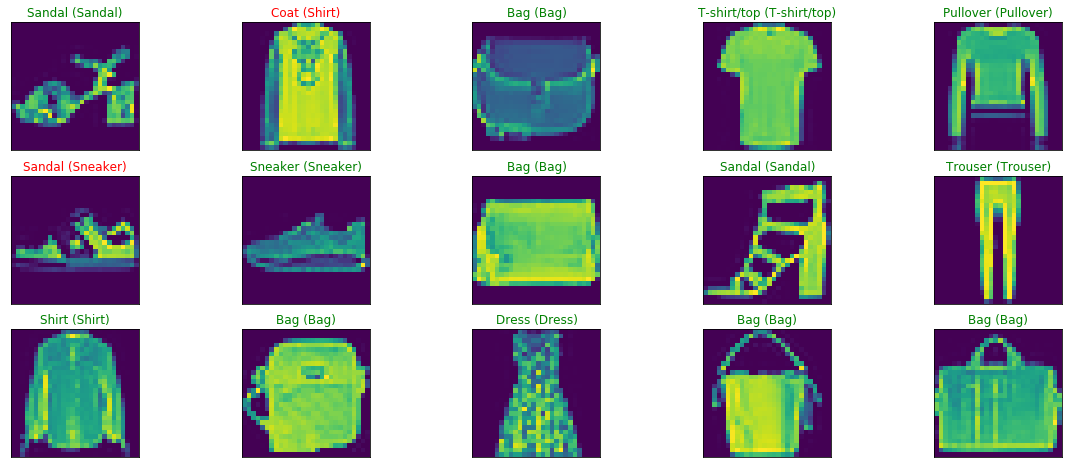

In [17]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))